# Explore here

Airbnb en Nueva York
Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.

Paso 1: Carga del conjunto de datos
Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv. Almacena los datos en crudo en la carpeta ./data/raw.

Paso 2: Realiza un EDA completo
Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.

Paso 3: Guarda el conjunto de datos procesado
Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben subir a git.

## Paso 1: Cargar el conjunto de datos:

In [60]:
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Paso 2: EDA:

In [61]:
total_data.shape

(48895, 16)

In [62]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Se pueden observar varios puntos a tener en cuenta:

- Existen un total de 48895 filas ( en este caso son viviendas localizadas en Nueva York) y 16 columnas, de las cuales podemos descartar algunas a la hora de realizar el EDA.
- La mitad de las columnas (10) se componen de caracteristicas numéricas y la otra mitad (6) se componen de caracteristicas categóricas.
- Las variables *last_review* y *reviews_per_month* cuentan con una gran cantidad de valores nulos, las variables *name* y *host_name* con una pequeña cantidad de nulos, y el resto de variables cuentan siempre con valor.

## Eliminación de duplicados:

In [63]:
print(f"El numero de duplicados de la columna name es de: {total_data['name'].duplicated().sum()}")
print(f"El numero de duplicados de la columna host_id es de: {total_data['host_id'].duplicated().sum()}")
print(f"El numero de duplicados de la columna id es de: {total_data['id'].duplicated().sum()}")

El numero de duplicados de la columna name es de: 989
El numero de duplicados de la columna host_id es de: 11438
El numero de duplicados de la columna id es de: 0


## Eliminar columnas irrelevantes:

In [64]:
total_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## PASO 3: Análisis de variables univariantes:

### Análisis de variables categóricas:

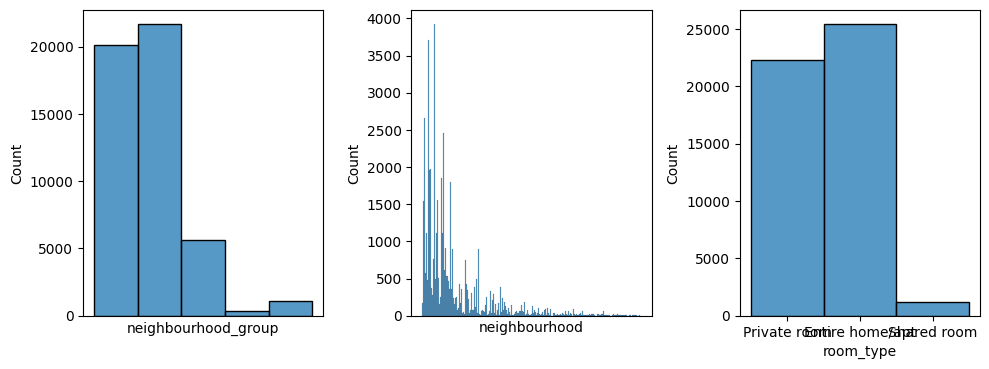

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0,0], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "room_type")
fig.delaxes(axis[1,0])
fig.delaxes(axis[1,1])
fig.delaxes(axis[1,2])

plt.tight_layout()

plt.show()

En este histograma se pueden observar los siguientes puntos:
- **Neighbourhood_group**: Se analizan los 5 distritos de Nueva York.
- **Neighbourhood**: Hay una gran diferencia de ofertas de alojamiento entre los distintos barrios.
- **Apartamentos**: Hay más ofertas de apartamentos enteros que de habitaciones privadas, y muchas más que de habitaciones compartidas.
- **Avaiability**: La mayoria de los apartamentos estan disponibles los 365 días del año, pero se puede observar que hay una gran cantidad de apartamentos que no tienen disponibilidad, lo que no tiene mucho sentido.

### Análisis de variables numéricas:

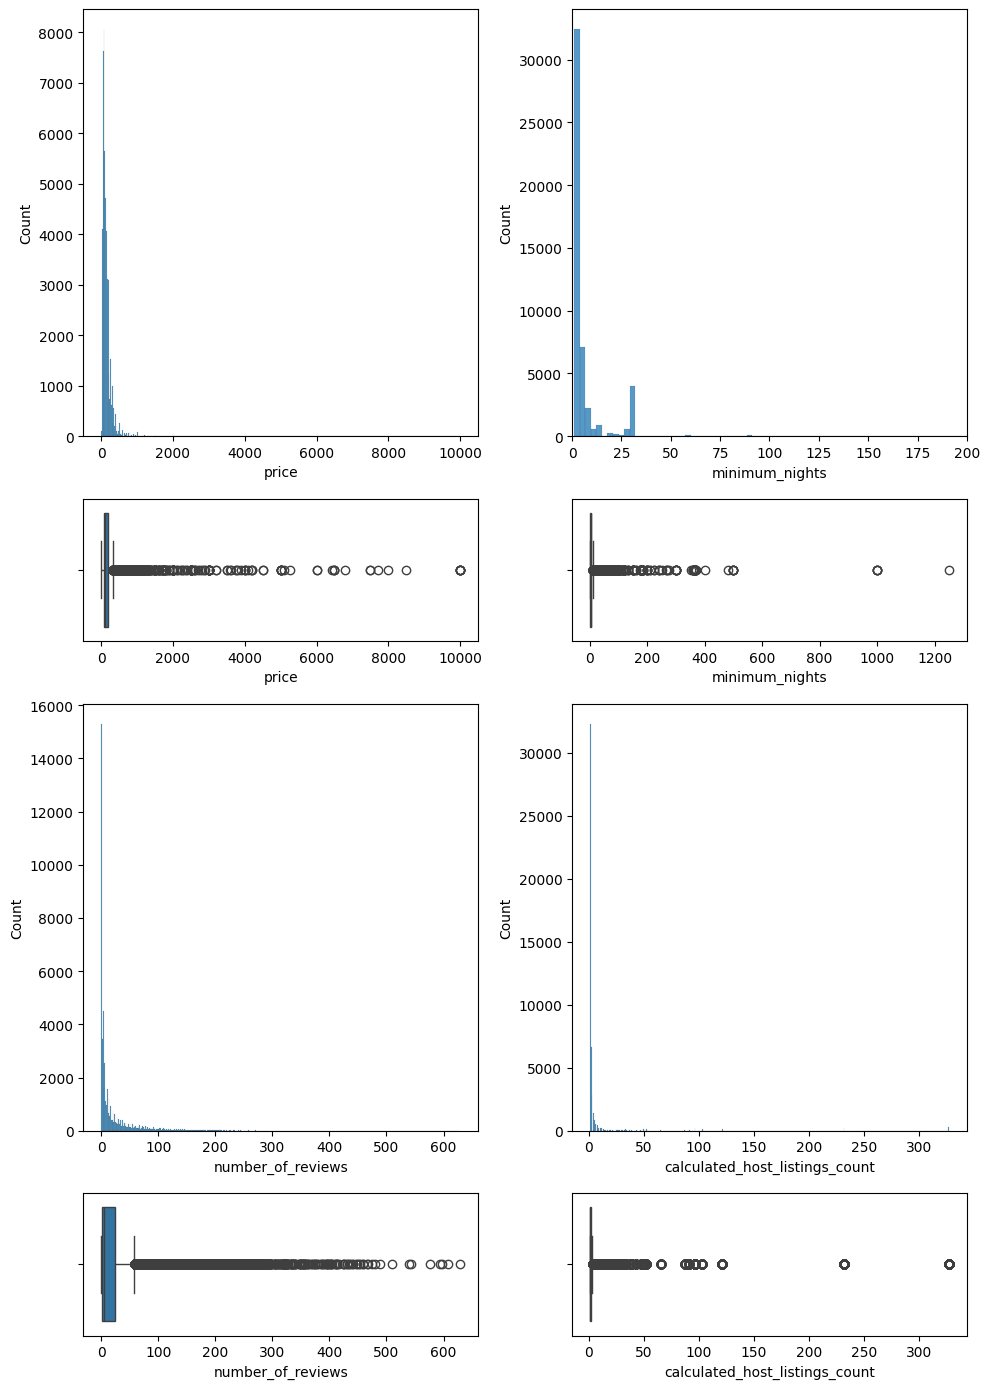

In [66]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [3, 1, 3, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

## Paso 4: Analisis de variables multivariante:

### Análisis numérico-numérico

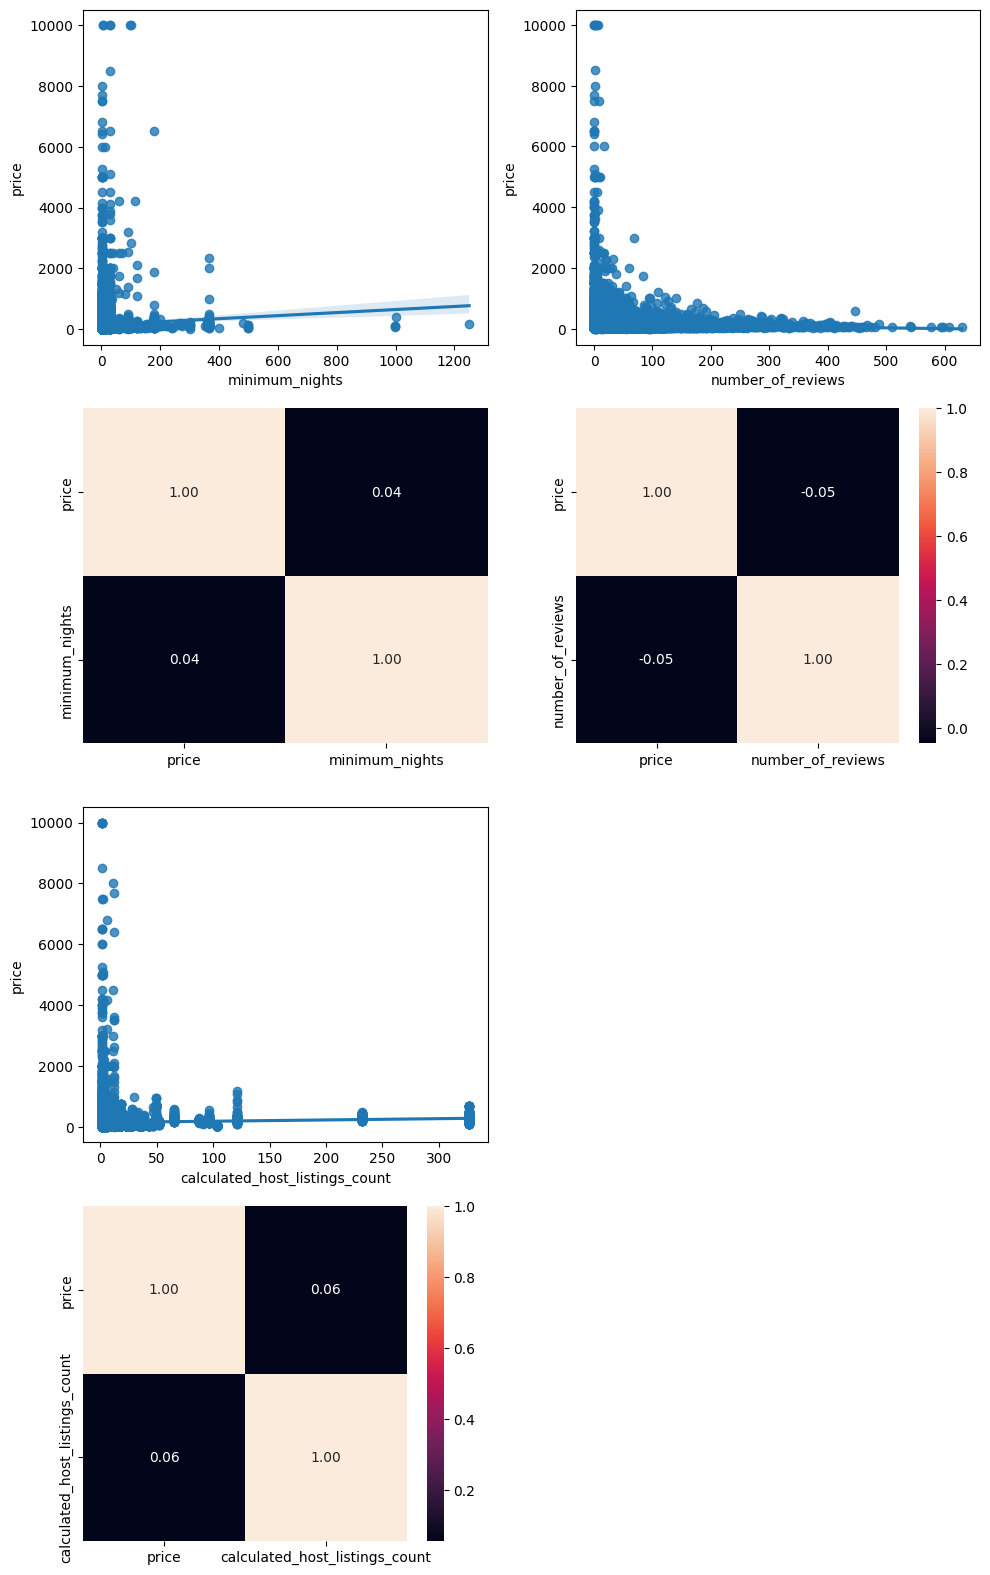

In [67]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price")
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

Se puede observar que no hay relación entre el precio y el resto de las variables graficadas.

### Análisis categórico-categórico:

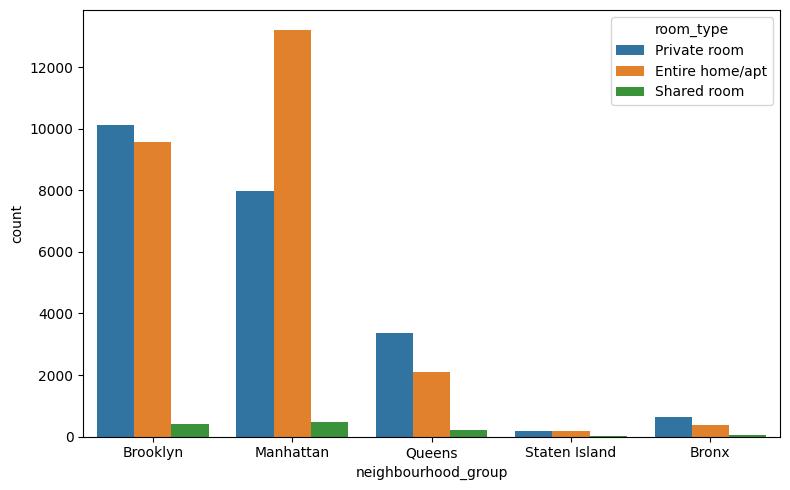

In [68]:
fig, axis = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(ax=axis, data=total_data, x="neighbourhood_group", hue="room_type")

plt.tight_layout()
plt.show()

plt.show()

- Se puede observar que Manhattan es el barrio con mayor número de casas.
- El lugar donde hay menos viviendas es Staten Island
- Brooklyn es el barrio donde mayor cantidad de habitaciones se pueden alquilar, y donde hay mayor igualdad entre el alquiler de habitaciones y de casas o pisos completos.

### Análisis de variables predictorias:

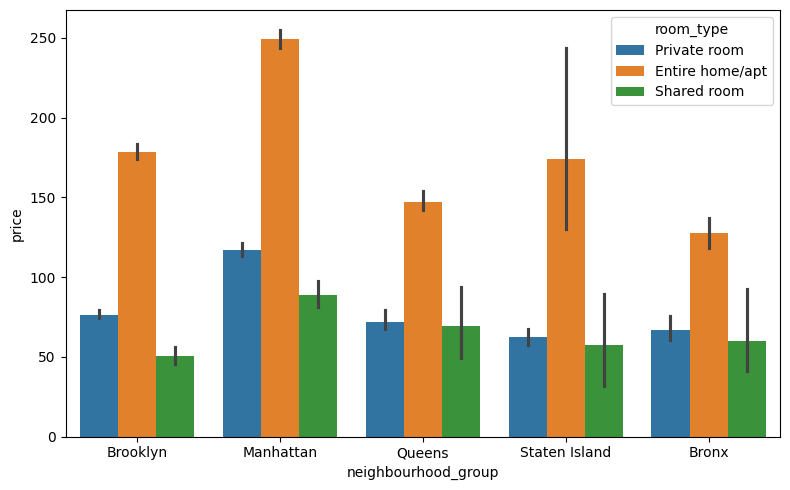

In [69]:
fig, axis = plt.subplots(1, 1, figsize=(8, 5))

sns.barplot(ax=axis, data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

- Los precios más altos se encuentran en Manhattan, siendo obviamente los pisos completos lo más caro en comparación a las habitaciones normales y compartidas.
- Los precios más bajos se encuentran en el Bronx; siendo también el barrio donde los precios de las tres posibilidades de alquiler son los más equivalentes entre sí.
- Las habitaciones compartidas son la modalidad de alquiler menos común de las tres posibilidades, pero también es la mas equivalente en cuanto a los precios sea el barrio que sea.

### Análisis de correlaciones:

In [70]:
total_data_c = total_data.copy()
total_data_c['room_type_n'] = pd.factorize(total_data_c['room_type'])[0]
total_data_c['neigh_g_n'] = pd.factorize(total_data_c['neighbourhood_group'])[0]

print(total_data_c[['neigh_g_n','neighbourhood_group']].drop_duplicates())
print(total_data_c[['room_type_n','room_type']].drop_duplicates())

     neigh_g_n neighbourhood_group
0            0            Brooklyn
1            1           Manhattan
46           2              Queens
169          3       Staten Island
171          4               Bronx
    room_type_n        room_type
0             0     Private room
1             1  Entire home/apt
39            2      Shared room


In [71]:
import json
import numpy as np
total_data_c_n = {row["neighbourhood_group"]: row["neigh_g_n"] for index, row in total_data_c[["neigh_g_n", "neighbourhood_group"]].dropna().drop_duplicates().iterrows()}
total_data_c_r = {row["room_type"]: row["room_type_n"] for index, row in total_data_c[["room_type_n", "room_type"]].dropna().drop_duplicates().iterrows()}
print(total_data_c_n)
print(total_data_c_r)

# Escritura
with open("./total_data_c_n.json", "w") as f:
  json.dump(total_data_c_n, f)

with open("./total_data_c_r.json", "w") as f:
  json.dump(total_data_c_r, f)

# Lectura
with open("./total_data_c_n.json", "r") as f:
  total_data_c_n = json.load(f)

with open("./total_data_c_r.json", "r") as f:
  total_data_c_r = json.load(f)

total_data_c["neigh_g_n"] = total_data_c["neighbourhood_group"].apply(lambda x: total_data_c_n[x] if not pd.isna(x) else np.nan)
total_data_c["room_type_n"] = total_data_c["room_type"].apply(lambda x: total_data_c_r[x] if not pd.isna(x) else np.nan)

total_data_c

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}
{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neigh_g_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,2,1


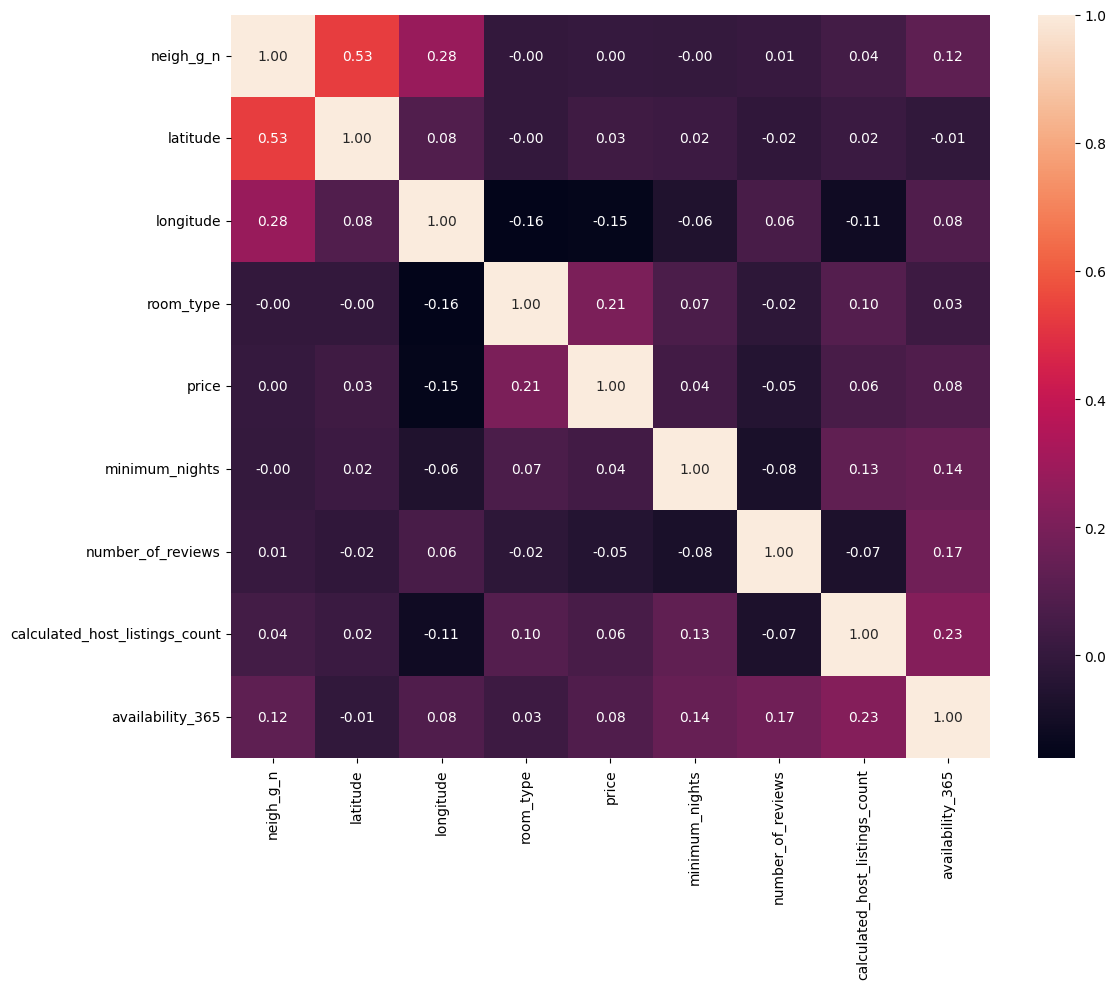

In [72]:
total_data_c["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data_c["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data_c["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (12, 10))

sns.heatmap(total_data_c[["neigh_g_n", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Hay una gran correlación entre la latitud y a longitud con la columna "neigh_g_n", siendo el barrio.
- Se observa como se ha indicado anteriormente que existe relación entre el precio y el "room_type o tipo de alquiler.
- También existe relación entre la disponibilidad y la cantidad de viviendas por propietario, siendo los propietarios con mayor cantidad de viviendas los que poseen mayor disponibilidad.


### Pairplot:

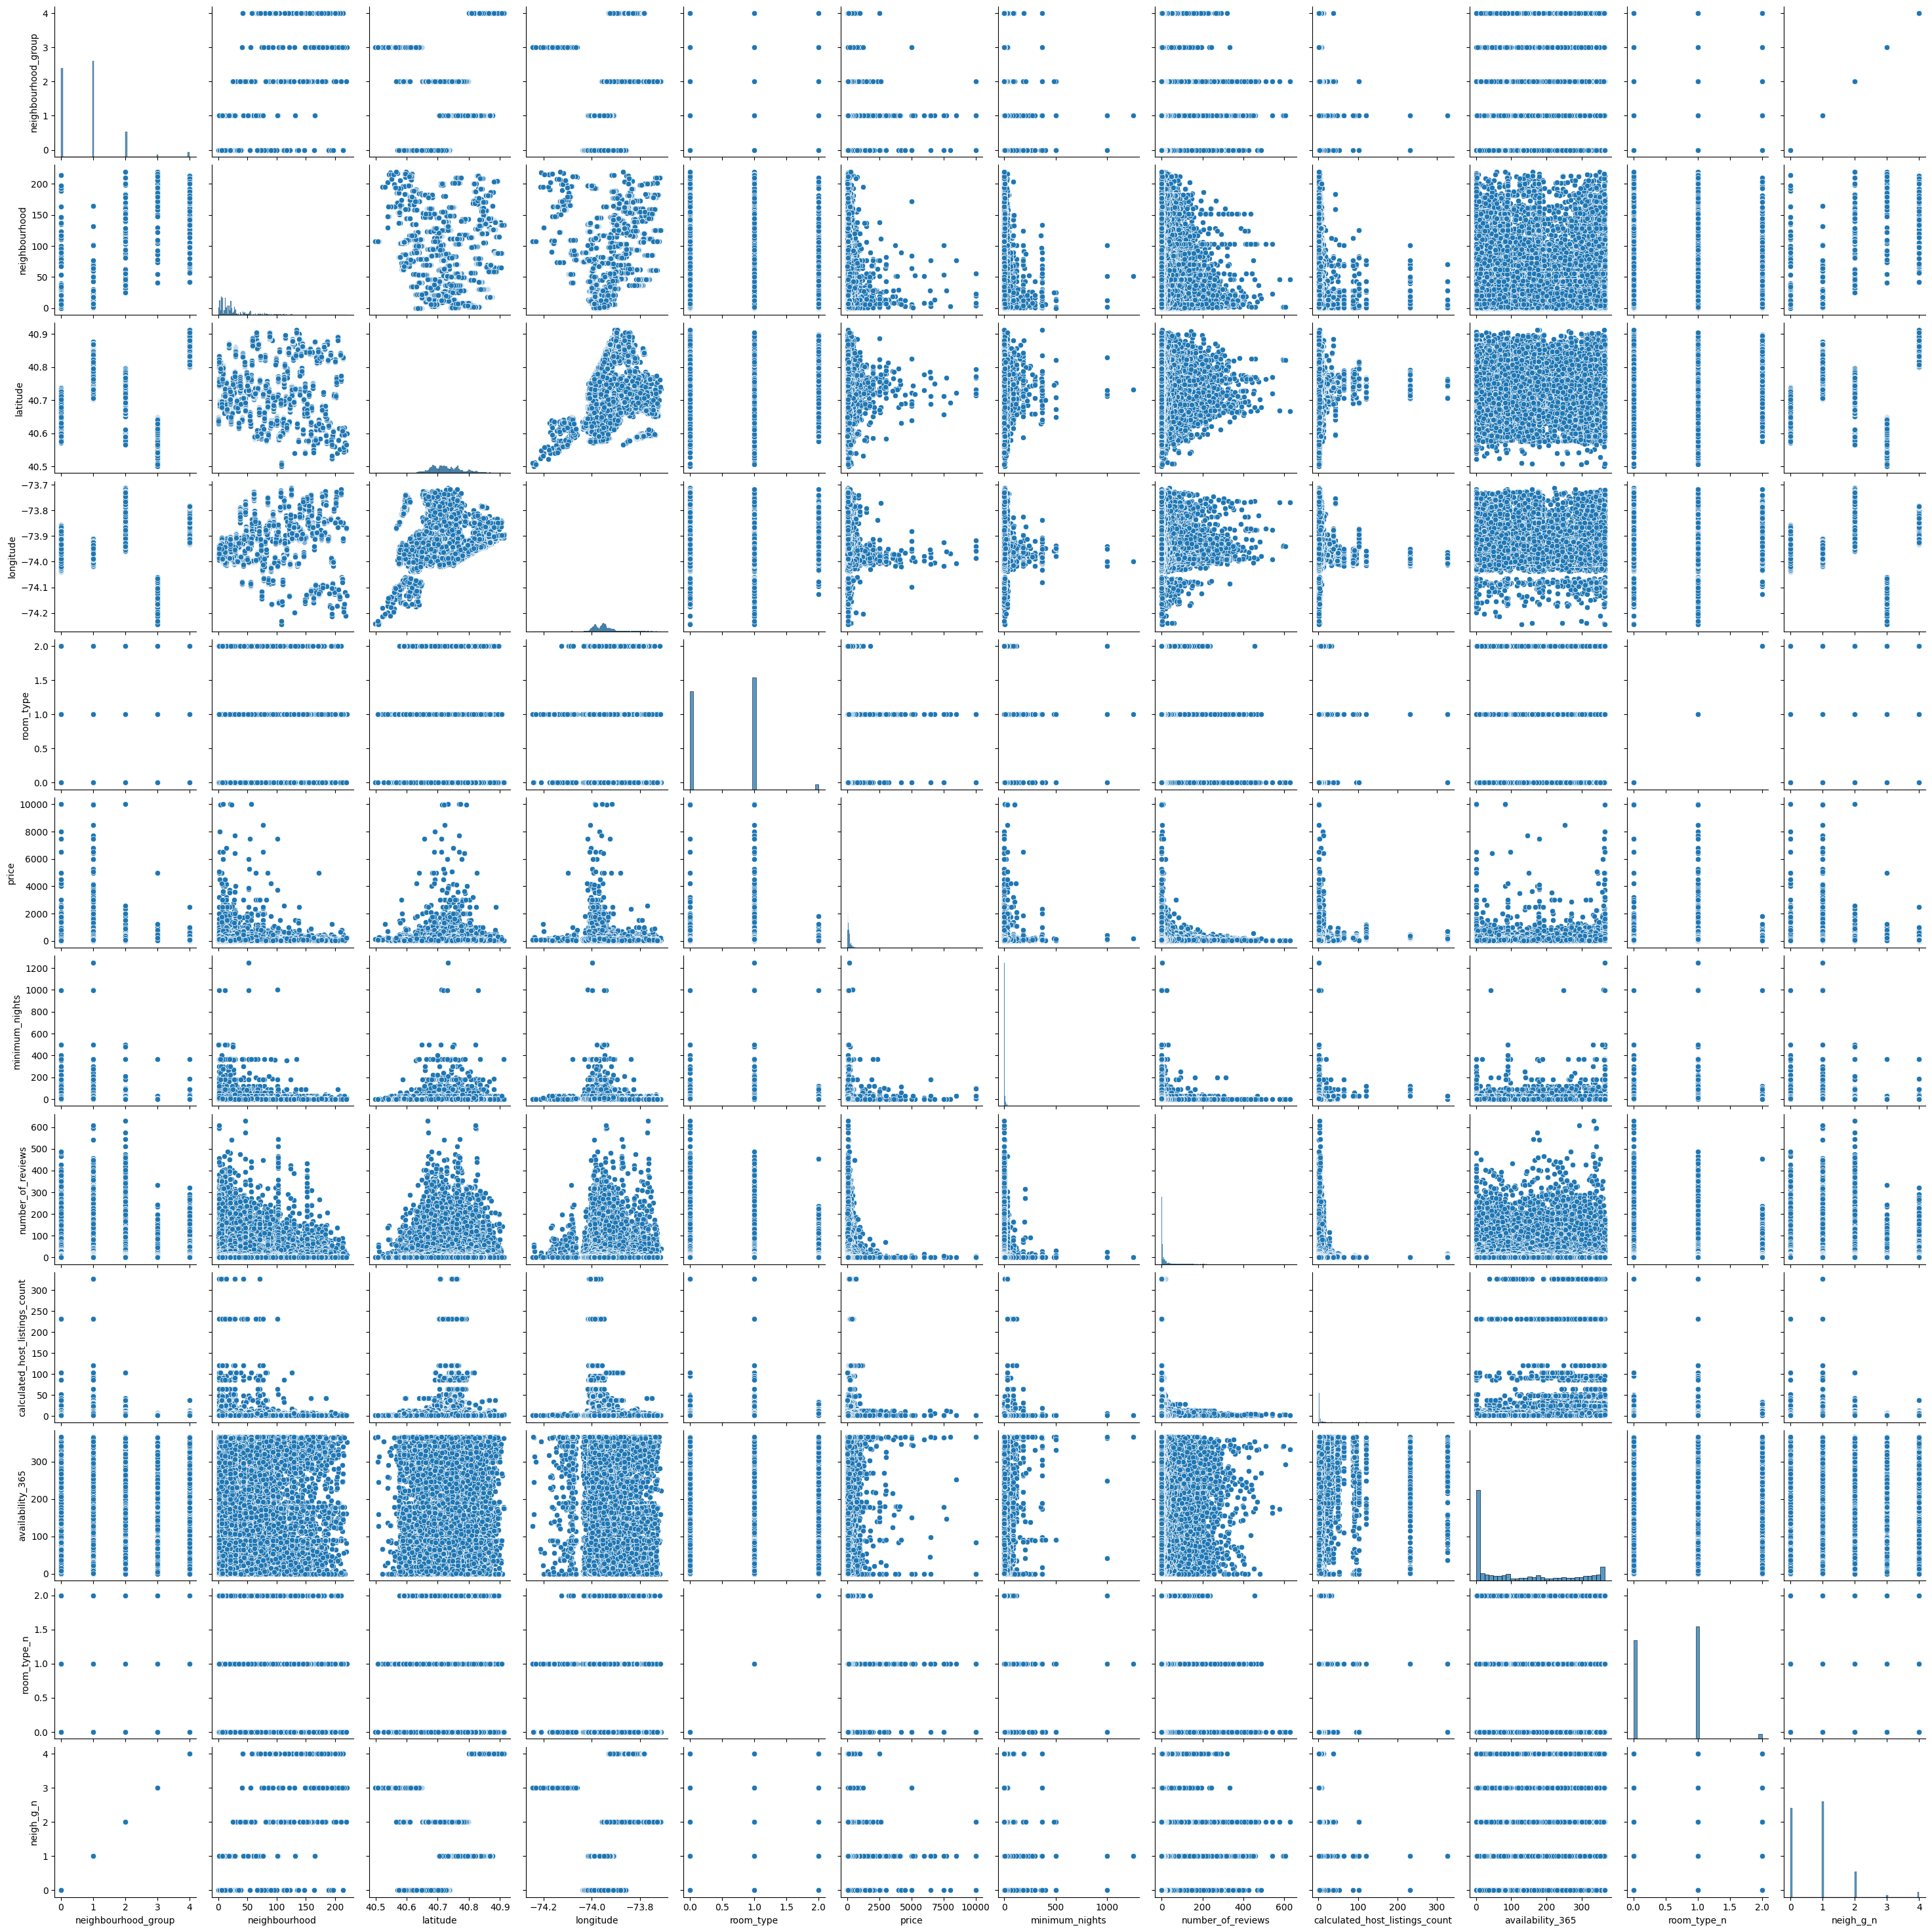

In [73]:
sns.pairplot(data=total_data_c)

## Paso 5: Ingeniería de características:

### Análisis de outliers

In [74]:
total_data_c.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neigh_g_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000


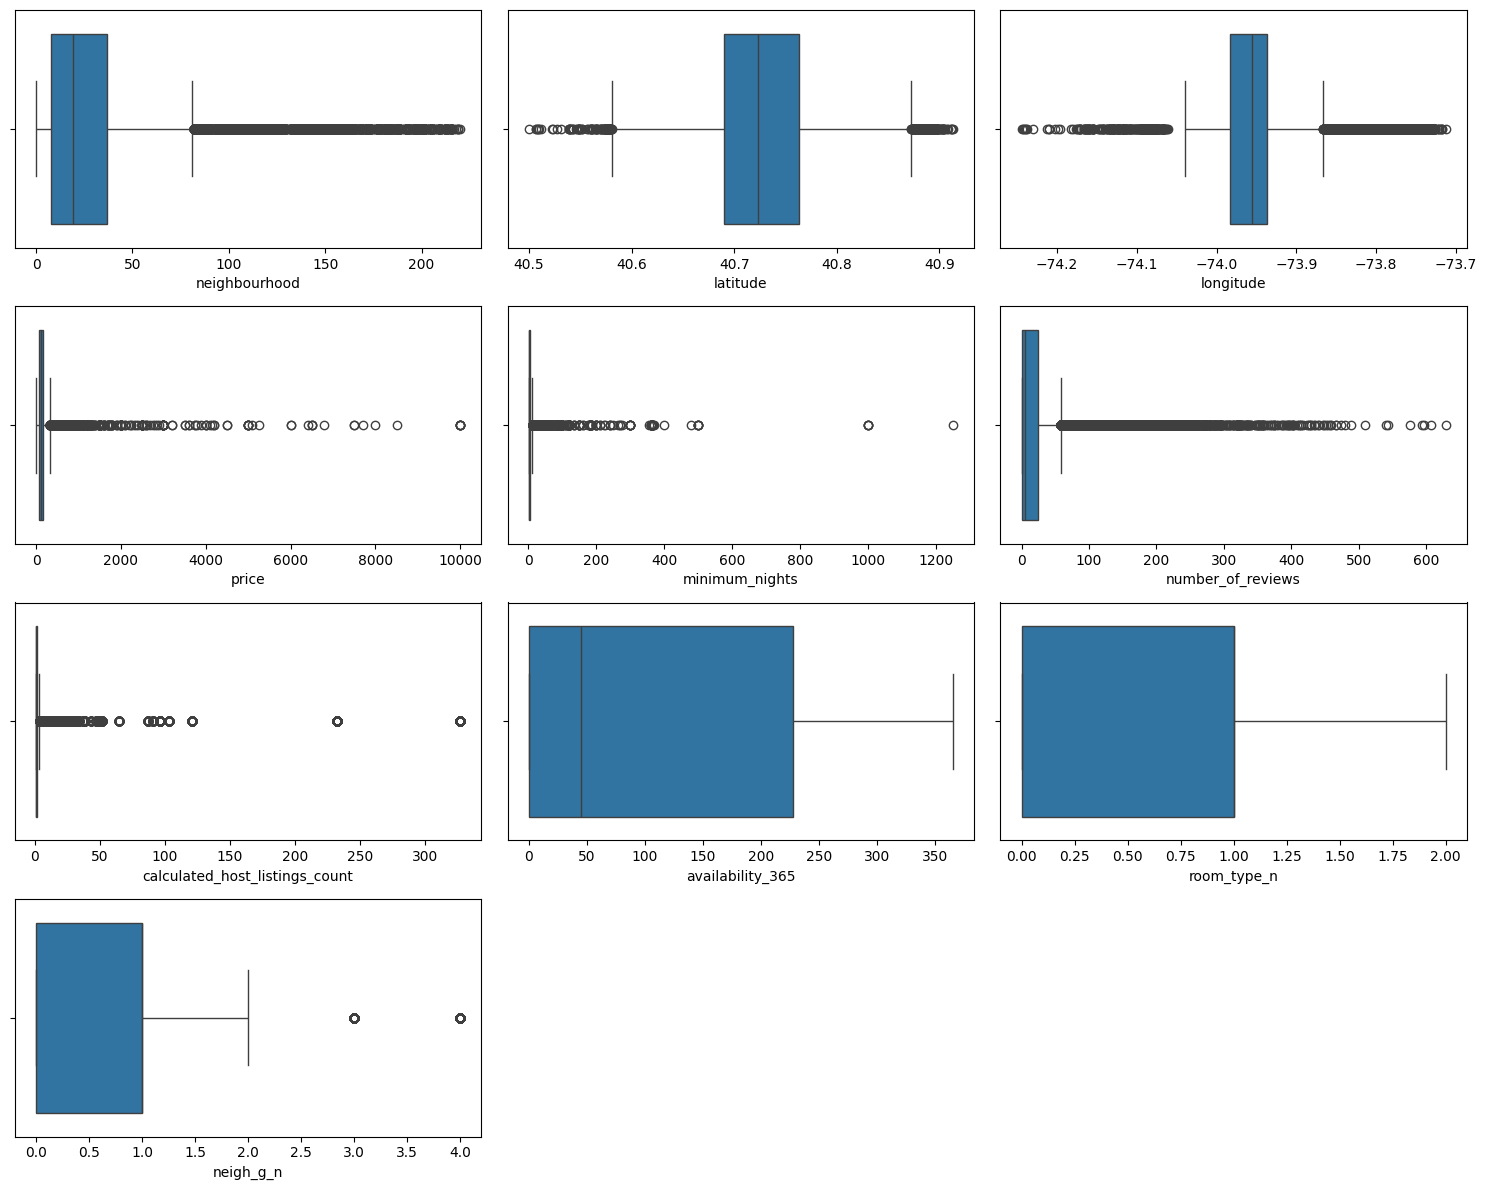

In [75]:
import math

total_data_out = total_data_c.copy().drop(columns=["neighbourhood_group", "room_type"])
n = len(total_data_out.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)

for idx, col in enumerate(total_data_out.columns):
    row = idx // n_cols
    col_pos = idx % n_cols
    sns.boxplot(ax=axis[row, col_pos], data=total_data_c, x=col)

fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()

- Menos en "availability_365", "room_type" y "neigh_g_n", hay varios puntos atípicos en el resto.
- Nos enfocamos en "price"

In [76]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [77]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr
if lower_limit < 0:
  lower_limit = 0

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, y su rango intercuartílico es de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y 0, y su rango intercuartílico es de 106.0


In [78]:
total_data[total_data["price"] > lower_limit]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [79]:
data_CON_outliers = total_data.copy()
data_CON_outliers['room_type_n'] = data_CON_outliers['room_type'].apply(lambda x: total_data_c_r[x] if not pd.isna(x) else np.nan)
data_CON_outliers['neigh_g_n'] = data_CON_outliers['neighbourhood_group'].apply(lambda x: total_data_c_n[x] if not pd.isna(x) else np.nan)
data_SIN_outliers = total_data.copy()
data_SIN_outliers['room_type_n'] = data_SIN_outliers['room_type'].apply(lambda x: total_data_c_r[x] if not pd.isna(x) else np.nan)
data_SIN_outliers['neigh_g_n'] = data_SIN_outliers['neighbourhood_group'].apply(lambda x: total_data_c_n[x] if not pd.isna(x) else np.nan)

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'latitude': [np.float64(40.580577500000004), np.float64(40.872637499999996)],
 'longitude': [-74.24442, np.float64(-73.86608249999999)],
 'price': [0, np.float64(334.0)],
 'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'calculated_host_listings_count': [1, np.float64(3.5)]}

In [80]:
data_CON_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neigh_g_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,2,1


In [81]:
data_SIN_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neigh_g_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,3.5,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365,0,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,1.0,194,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9,0,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36,0,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,1.0,27,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0.0,3.5,2,2,1


In [82]:
print(data_CON_outliers['price'].describe())
print(data_SIN_outliers['price'].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64


- La media y el std han bajado, al igual que el máximo.

### Análisis de valores faltantes

In [83]:
data_CON_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neigh_g_n                         0
dtype: int64

In [84]:
data_SIN_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neigh_g_n                         0
dtype: int64

In [85]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Como se puede ver, no hay valores nulos en el DF

### Escalado de valores

In [86]:
from sklearn.model_selection import train_test_split

num_variables = ["neigh_g_n", "latitude", "longitude", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

X_CON = data_CON_outliers.drop("price", axis = 1)[num_variables]
y = data_CON_outliers["price"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = data_SIN_outliers.drop("price", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,neigh_g_n,latitude,longitude,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0,40.71577,-73.95530,1,3,11,1,1
23615,1,40.84917,-73.94048,0,2,2,1,0
31183,0,40.68993,-73.95947,0,2,0,2,0
29260,0,40.68427,-73.93118,1,3,87,1,267
7275,2,40.74705,-73.89564,0,5,13,1,0


In [87]:
from sklearn.preprocessing import StandardScaler

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers) 
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers) #Se repite el proceso pero sin outliers
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,neigh_g_n,latitude,longitude,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,-0.931915,-0.241172,-0.064946,0.798949,-0.193025,-0.277198,-0.186570,-0.852862
23615,0.256169,2.204077,0.257030,-1.050482,-0.239596,-0.479451,-0.186570,-0.860447
31183,-0.931915,-0.714824,-0.155542,-1.050482,-0.239596,-0.524396,-0.156424,-0.860447
29260,-0.931915,-0.818573,0.459080,0.798949,-0.193025,1.430714,-0.186570,1.164663
7275,1.444253,0.332197,1.231213,-1.050482,-0.099884,-0.232253,-0.186570,-0.860447


### Escalado Mínimo-Máximo

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,neigh_g_n,latitude,longitude,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.00,0.522612,0.542691,0.5,0.001601,0.017488,0.000000,0.002740
23615,0.25,0.845404,0.570660,0.0,0.000801,0.003180,0.000000,0.000000
31183,0.00,0.460087,0.534821,0.0,0.000801,0.000000,0.003067,0.000000
29260,0.00,0.446391,0.588212,0.5,0.001601,0.138315,0.000000,0.731507
7275,0.50,0.598301,0.655286,0.0,0.003203,0.020668,0.000000,0.000000


In [89]:
lista = ["X_train_con_outliers", "X_train_sin_outliers", "X_train_con_outliers_norm", "X_train_sin_outliers_norm", "X_train_con_outliers_scal", "X_train_sin_outliers_scal",
         "X_test_con_outliers", "X_test_sin_outliers", "X_test_con_outliers_norm", "X_test_sin_outliers_norm", "X_test_con_outliers_scal", "X_test_sin_outliers_scal",
         "y_train", "y_test"]
for var in lista:
    globals()[var].to_excel(f"../data/processed/{var}.xlsx", index = False)

"""X_train_con_outliers.to_excel("/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/data/processed/y_test.xlsx", index = False)"""

'X_train_con_outliers.to_excel("/data/processed/X_train_con_outliers.xlsx", index = False)\nX_train_sin_outliers.to_excel("/data/processed/X_train_sin_outliers.xlsx", index = False)\nX_train_con_outliers_norm.to_excel("/data/processed/X_train_con_outliers_norm.xlsx", index = False)\nX_train_sin_outliers_norm.to_excel("/data/processed/X_train_sin_outliers_norm.xlsx", index = False)\nX_train_con_outliers_scal.to_excel("/data/processed/X_train_con_outliers_scal.xlsx", index = False)\nX_train_sin_outliers_scal.to_excel("/data/processed/X_train_sin_outliers_scal.xlsx", index = False)\n\nX_test_con_outliers.to_excel("/data/processed/X_test_con_outliers.xlsx", index = False)\nX_test_sin_outliers.to_excel("/data/processed/X_test_sin_outliers.xlsx", index = False)\nX_test_con_outliers_norm.to_excel("/data/processed/X_test_con_outliers_norm.xlsx", index = False)\nX_test_sin_outliers_norm.to_excel("/data/processed/X_test_sin_outliers_norm.xlsx", index = False)\nX_test_con_outliers_scal.to_excel("

In [90]:
import pickle

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)